In [4]:
%matplotlib inline
import matplotlib.pylab as plt
import networkx as nx
import netwulf as nw
import numpy as np


In [ ]:
# Ex. 11.1.1: But as I wrote above there are many different types of compartmental models. Write down the rate equations 
# for the SIS model:

# How many equations you need if there are two compartments?
# What specifically does each equation describe?
# What do beta and gamma intuitively describe? What can you say about a disease with a really big gamma? Or a 
# really small gamma? How about big or small beta?

# We need an equation for the evolution of the number of individuals in each compartments. Note that in this SIS model  
# individuals can transit from susceptible to infectious and from infectious to susceptible. Hence, we need two equations.

# The rate which susceptible individuals becomes infected is given by beta*S*I and the rate which infected individuals
# becomes susceptible is given by gamma*I. Hence, the evolution in the number of infected individuals is given by:

#                                  dI/dt = beta*S*I - gamma*I

# and the evolution of the number of susceptible individuals is given by

#                                  dS/dt = gamma*I - beta*S*I

# Hence, for beta*S/gamma>(<)1 the number of infected individuals increases (decreases).

# beta measures rapidly the diseas spread whereas gamma measures how fast individuals return from the infected compartment 
# to the susceptible compartment. Hence, for a big beta the diseas spreads rapidly whereas a big gamma implies that 
# individuals return from the infected compartment rapidly.


In [ ]:
# Ex. 11.1.2 (optional): If you really understood the above, you should have no trouble writing down the equations for 
# a SIRS model. Go ahead and try. Hint: You will need to introduce a new constant that describes the rate at which people 
# move from R to S.

# In the SIRS model we have three compartmens (Susceptable, Infected and Recovered). Individals can only transit to the 
# infected compartment from the susceptable compartment and can only transit to the recovered compartment from the infected
# compartment. Finally, individuals can only return to the susceptible compartment from the recovered compartment.

# The evolution in the number of infected individuals is again given by:

#                                  dI/dt = beta*S*I - gamma*I

# whereas the evolution of the number of recovered individuals is given by

#                                  dR/dt = gamma*I - kappa*R

# where the kappa parameter describes how fast individuals stops being immune to the diseas and return to the susceptible
# compartment. Finally, the evolution of the number of susceptible individuals is given by

#                                  dS/dt = kappa*R - beta*S*I

In [ ]:
# Ex. 11.1.3: Professor of physics and mathematic and all around cool guy, Dirk Brockmann, makes interactive articles 
# called Explorables that introduce ideas in Complexity science. Read/play with his explorable on targeted vaccination 
# to mitigate epidemic spreading in the real world and answer the following questions:

# 1. In the BA network, roughly what percentage of the population do you have to vaccinate with strategy A to only get 
# around 10 infected individuals? What about startegy B and strategy C?
# 2. Strategy A and strategy C are both entirely random, but one is much more effective than the other. Explain why. What 
# clever idea is strategy C employing?
# 3. Why is this effect larger in the BA network than in the ER network?

# When I apply strategy A, I find that I need to vaccinate about 80% of the population in order to have the largest component 
# of 10 individuals. For strategy B I only need to vaccinate 15-20% of the population. Finally, for strategy C I need to 
# vaccinate about 50% of the population. Hence, we would prefer strategy B, but since we often does not know the links of
# the entire network this strategy is seldom available. In practice we are therefor stucked with strategy A or C. 

# By applying strategy C we vaccine more connected individuals than by applying strategy A. Hence, we need to vaccine fewer
# individuals to stop the diseas. The reasons for the relative effectiveness of strategy C is closely related to the so
# called "friendship paradox" that essentially states that you are less likely to be friends with someone who has very few
# friends. The implication of the "friendship paradox" is that is that on average a node's neighbors' degree is larger than 
# the node's own degree and this is why strategy C implies that we vaccine more connected individuals compared to strategy A.

# The effect of applying strategy C is bigger for a BA network compared to an ER network. This is because "the BA network has 
# a much stronger variation in node degree compared to the ER network. Therefore the effects explained above should be 
# stronger in the BA network".


In [ ]:
# Ex. 11.1.4: Choose one of these two explorables (1 or 2) read/play with and understand it, and explain in your own words 
# what phenomenon it communicates.

# Explorables 2 describes how a diseas spread in a SIRS model with 4 partly isolated subpopulations. Hence, we set up a system
# of equations that describes the evolution of susceptible, infected and recovered individuals for each population. 

# The evolution in the number of infected individuals in subpopulation group 1 is given by:

#                                  dI_1/dt = beta*S_1*I_1 - gamma*I_1 + theta*(I_2+I_3+I_4) - theta*I_1

# where the theta parameter describes the immigration rate. The evolution of the number of recovered individuals in population
# 1 is given by

#                                  dR_1/dt = gamma*I_1 - kappa*R_1 + theta*(R_2+R_3+R_4) - theta*R_1

# Finally, the evolution of the number of susceptible individuals in population 1 is given by
 
#                                  dS_1/dt = kappa*R_1 - beta*S_1*I_1 + theta*(S_2+S_3+S_4) - theta*S_1

# The evolution of the components of the three remaining subpopulations are similar to the equations stated above. Note that
# I have assumed that none of the parameters differs across subpopulations and that individuals immigrate with the same
# probability across components. Futher I have ignored traveling time.

# This model facilitates that the diseas can rapidly expand if an infected individual immigrates to a subpopulation that does
# not have been exposed to the diseas in recent time, and hence very few individuals are immune to the diseas.

In [ ]:
# Ex. 11.1.5: The simplest compartmental model is the SI model. Below I have implemented a simulation of such a model. 
# You can see in line 5 that I initialize all nodes in the S compartment, but after running, all nodes are in the I 
# compartment. Does this make sense to you?



In [22]:
# Create a undirectednetwork of ten caves each with five nodes. Each of these five notes are linked to each other. 
# Each cave is linked to two other caves through two different nodes inside the particular cave. 
G = nx.connected_caveman_graph(10, 5) 
#_ = nw.visualize(G) # Uncomment if you want to have a look at the network

p_I = 0.1 # probability that a neigbor to an infected node gets infected in each time period.
n_iter = 200  # number of time periods.

I = set() # set containing the infected nodes. Empty at the beginning.
S = set(G.nodes()) # set containing the susceptible nodes. Containes all nodes at the beginning.

N = len(S) # number of nodes

# Initialize epidemic by randomely choosing patient zero from the set containing all the susceptible nodes.
patient0 = np.random.choice(list(S)) 

I.add(patient0) # Adds the randomely selected patient zero to the set containing the infected nodes
S.remove(patient0) # Removes the randomely selected patient zero to the set containing the susceptible nodes

counter = np.zeros(n_iter)

for t in range(n_iter): # loop over timer periods
    counter[t] = len(I)
    for infected_node in list(I): # loop over infected nodes at the beginning of time period t.
        neighbors = G.neighbors(infected_node) # finds the neighbors the a given infected node
        # for each neighbor randomely draw a number from the uniform distribution. 
        # If this number is less than p_I add this node to the set containing the 
        # infected neighbors.
        infected_neighbors = set([n for n in neighbors if np.random.random() < p_I]) 
        I |= infected_neighbors # Add the set of infected_neighbors to the set containing all infected nodes.
        S -= infected_neighbors # Remove the set of infected_neighbors to the set containing all infected nodes.
    
    #print("time: ",t,", infected nodes:",len(I),", susceptible nodes:",len(S))
    
fraction = counter/N # fraction of population infected across time

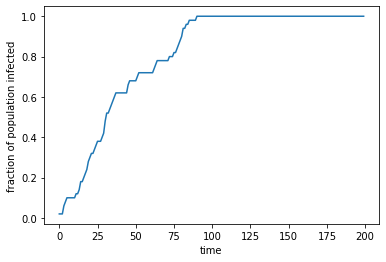

In [23]:
import matplotlib.pyplot as plt
plt.plot(fraction)
plt.ylabel('fraction of population infected')
plt.xlabel('time')
plt.show()

# After looping over all the infected nodes at time t the set I now contains all the nodes that are infected at 
# time t+1. Note that since infected nodes cannot be cured, the number of infected nodes can only increase. Hence, 
# for t going to infinity all nodes will eventually get infected.

In [29]:
# Create a undirectednetwork of ten caves each with five nodes. Each of these 
# five notes are linked to each other. Each cave is linked to two other caves
# through two different nodes inside the particular cave. 
G = nx.connected_caveman_graph(10, 5) 
#_ = nw.visualize(G) # Uncomment if you want to have a look at the network

p_I = 0.1 # probability that a neigbor to an infected node gets infected in each time period.
n_iter = 200  # number of time periods.
T_I = 10

I = set() # set containing the infected nodes. Empty at the beginning.
S = set(G.nodes()) # set containing the susceptible nodes. Containes all nodes at the beginning.

patient0 = np.random.choice(list(S)) # Initialize epidemic by randomely choosing patient zero from the set containing all the susceptible nodes.

I.add(patient0) # Adds the randomely selected patient zero to the set containing the infected nodes
S.remove(patient0) # Removes the randomely selected patient zero to the set containing the susceptible nodes

counter = np.zeros(n_iter)

T = np.zeros(n_iter) # remaining time periods for the diseas for each node( if zero then the node is susceptible)
T[patient0] = T_I

for t in range(n_iter): # loop over timer periods
    counter[t] = len(I)
    C = np.zeros(n_iter)
    for infected_node in list(I):
        T[infected_node] = T[infected_node] - 1
        
        if T[infected_node]==0:
            S.add(infected_node) # Adds the randomely selected patient zero to the set containing the infected nodes
            I.remove(infected_node) # Removes the randomely selected patient zero to the set containing the susceptible nodes
            C[infected_node] = 1

    for infected_node in list(I): # loop over infected nodes at the beginning of time period t.
        neighbors = G.neighbors(infected_node) # finds the neighbors the a given infected node
        # for each neighbor randomely draw a number from the uniform distribution. 
        # If this number is less than p_I add this node to the set containing the 
        # infected neighbors.
        infected_neighbors = set([n for n in neighbors if np.random.random() < p_I]) 
        I |= infected_neighbors # Add the set of infected_neighbors to the set containing all infected nodes.
        S -= infected_neighbors # Remove the set of infected_neighbors to the set containing all infected nodes.
        
        for inf_neigh in list(infected_neighbors):
            T[inf_neigh] = T_I
    
    #print("time: ",t,", infected nodes:",len(I),", susceptible nodes:",len(S), ", cured nodes:", np.sum(C))
    
fraction2 = counter/N # fraction of population infected across time    

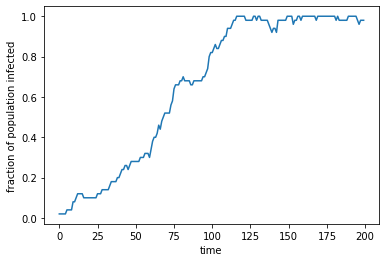

In [30]:
import matplotlib.pyplot as plt
plt.plot(fraction2)
plt.ylabel('fraction of population infected')
plt.xlabel('time')
plt.show()

# Note that this implementation implies that nodes can get reinfected while they are infected. This implies that node's
# infection time is prolonged. Hence, the number of infected individuals can now decrease.

In [35]:
#Ex. 11.1.6: Use what you have learned and implement an SIRS model.

# - Run it on the Facebook network from last week (so load that into a networkx.Graph).
# - Record the fraction of infected, susceptiple and recovered over time.
# - After the simulation has run, plot these quantities over time and comment on your results
# - Be proud of yourself for having solved a really interesting problem.

import pandas as pd

data = pd.read_csv(
    'facebook-wall.txt.gz', 
    compression='gzip',
    delimiter="\t",
    header=None,
    names=['user1', 'user2', 'timestamp'], 
    sep=' ', quotechar='"', error_bad_lines=False)

def SliceDiGraph(data,t0,t1):
    # Subset of the pandas dataframe
    data_t = data.loc[data.timestamp.between(t0, t1)]

    # Count the number of times each link occurs and store that in a new 'weight' column
    data_t = data_t.groupby(['user1', 'user2']).size().reset_index(name='weight')

    # Create a `nx.DiGraph` from this dataframe
    G_t = nx.from_pandas_edgelist(data_t, 'user1', 'user2', 'weight', create_using=nx.DiGraph)
    return G_t

t0 = data.timestamp.min() # Lower bound of time-slice (here: 365 days before last wall post)
t1 = data.timestamp.max() # Lower bound of time-slice

G0 = SliceDiGraph(data,t0,t1)

# double_edge_swap can only handle undirected network. Hence, I transform network from directed network to undirected network:
G = G0.to_undirected() 
# Note that this is major change of the original data and changes the interpretation of the network.


AttributeError: 'Graph' object has no attribute 'head'